# NBA DATASET 


Goal : after merging 4 data sets into a single data set, examine this data file.

### Meanings of Categories
- *Min: * Minutes Played
- *FTM-A: * Free Throws made-Attempted
- **REB:  ** Rebounds
- **BS: ** Blocked Shots
- **FGM-A: ** Field Goals Made-Attempted
- **FT%: ** Free Throw Percentage
- **AST: ** Assists
- **BA: ** Block Against
- **FG%: ** Field Goal Percentage 
- **+/- : ** Plus Minus
- **PF= ** Personel 
- **Fouls= ** Kişisel Faul
- **PTS: ** Points= Sayı
- **3PM-A: ** Three Point Field Goals Made-Attempted
- **OREB: **Offensive Rebounds
- **STL: ** Steals
- **3P%: **3Point field Goals Percentage
- **2P%: **2Point field Goals Percentage
- **DREB: ** Defensive Rebounds
- **TO: ** Turnovers: Top Kaybı

Libraries imported

In [192]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from warnings import filterwarnings
from subprocess import check_output

sets the backend of matplotlib to the 'inline' backend

In [193]:
%matplotlib inline

row and column settings

In [194]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

Uploaded mvp data. The limiter was specified when loading the data to avoid errors.

In [195]:
mvps = pd.read_csv("C://Users//NORA JDK//archive//mvps.csv", encoding="latin-1", delimiter=";")
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,0.005,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,12,Ben Simmons,24,PHI,0,3,1010,0.003,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13T,LeBron James,36,LAL,0,1,1010,0.001,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [196]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891,960,0.928
1,Magic Johnson,1991,497,960,0.518
2,David Robinson,1991,476,960,0.496
3,Charles Barkley,1991,222,960,0.231
4,Karl Malone,1991,142,960,0.148


Uploaded the players' data. The limiter was specified when loading the data to avoid errors.

In [197]:
players = pd.read_csv("C://Users//NORA JDK//archive//players.csv", encoding="latin-1", delimiter=";")
players.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,0,0,0,1.3,2.7,0.474,0.474,0.6,1,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,0.413,0.4,1.5,0.24,5.9,13.6,0.432,0.425,1.3,1.5,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,0.509,0,0,0.333,1.6,3.1,0.512,0.512,1,1.5,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,0.394,2.5,8.5,0.296,6,13,0.459,0.453,7,8,0.879,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,0.462,0.3,1,0.308,5.1,10.7,0.477,0.475,3.1,4.1,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,6,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,1.3,3.1,0.406,2.9,5.8,0.508,0.543,1.4,1.7,0.826,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,7,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,0.44,0.1,0.5,0.238,2.2,4.9,0.461,0.451,1,1.1,0.854,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,8,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,0.504,0.2,0.7,0.304,1.5,2.8,0.553,0.534,0.8,0.9,0.839,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,0.43,0,0,0,1.7,4,0.431,0.43,0.9,1.7,0.522,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,0.37,0,0,0,1,2.8,0.375,0.37,0.6,1.1,0.571,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


deleted the unnecessary columns.

In [198]:
del players["Rk"]

 removed the asterisks from the player names.

In [199]:
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [200]:
players.head(30)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,0,0,0,1.3,2.7,0.474,0.474,0.6,1,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,0.413,0.4,1.5,0.24,5.9,13.6,0.432,0.425,1.3,1.5,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,0.509,0,0,0.333,1.6,3.1,0.512,0.512,1,1.5,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,0.394,2.5,8.5,0.296,6,13,0.459,0.453,7,8,0.879,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,0.462,0.3,1,0.308,5.1,10.7,0.477,0.475,3.1,4.1,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,1.3,3.1,0.406,2.9,5.8,0.508,0.543,1.4,1.7,0.826,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,0.44,0.1,0.5,0.238,2.2,4.9,0.461,0.451,1,1.1,0.854,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,0.504,0.2,0.7,0.304,1.5,2.8,0.553,0.534,0.8,0.9,0.839,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,0.43,0,0,0,1.7,4,0.431,0.43,0.9,1.7,0.522,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,0.37,0,0,0,1,2.8,0.375,0.37,0.6,1.1,0.571,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [201]:
players[players["Player"] == "Delon Wright"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
14590,Delon Wright,PG,23,TOR,27,1,8.5,1.3,3,0.45,0.2,0.5,0.385,1.1,2.5,0.463,0.481,1,1.3,0.743,0.3,1.1,1.4,1.1,0.3,0.1,0.6,0.3,3.8,2016
15205,Delon Wright,PG,24,TOR,27,0,16.5,1.8,4.3,0.422,0.4,1.1,0.333,1.4,3.2,0.453,0.466,1.6,2,0.764,0.6,1.2,1.8,2.1,1,0.4,0.9,1.1,5.6,2017
15892,Delon Wright,PG,25,TOR,69,4,20.8,2.9,6.3,0.465,0.8,2.2,0.366,2.1,4,0.52,0.53,1.4,1.7,0.829,0.7,2.2,2.9,2.9,1,0.5,1.1,1.2,8,2018
16623,Delon Wright,PG,26,TOT,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1,1.4,8.7,2019
16624,Delon Wright,PG,26,TOR,49,2,18.3,2.6,6,0.433,0.6,1.8,0.333,2,4.1,0.478,0.485,1.1,1.2,0.869,0.8,1.8,2.6,2.2,0.9,0.3,0.8,1.1,6.9,2019
16625,Delon Wright,PG,26,MEM,26,11,30.8,4.4,10.2,0.434,0.8,3,0.256,3.7,7.2,0.508,0.472,2.5,3.4,0.742,1.1,4.3,5.4,5.3,1.6,0.6,1.5,1.9,12.2,2019
17306,Delon Wright,PG,27,DAL,73,5,21.5,2.6,5.6,0.462,0.6,1.7,0.37,2,3.9,0.504,0.519,1.1,1.4,0.77,1,2.9,3.8,3.3,1.2,0.3,1,1.3,6.9,2020
18037,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,1,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2,0.802,1,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
18038,Delon Wright,SG,28,DET,36,31,29.2,3.8,8.1,0.464,0.9,2.5,0.348,2.9,5.7,0.515,0.517,2,2.5,0.789,1,3.5,4.6,5,1.6,0.5,1.3,1.3,10.4,2021
18039,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.5,0.536,1.1,1.3,0.833,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021


I put the players side by side so that it would be easy for us to look. In this way, we can also look at their performances in different years without descending.

In [202]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

In [203]:
players.tail(15)

Player Pos Age   Tm   G  GS    MP   FG  FGA    FG%   3P  3PA    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Year
Player               Year                                                                                                                                                                                       
ar?nas Mar?iulionis 1997 3258   ar?nas Mar?iulionis  SG  32  DEN  17   0    15  2.2  5.9  0.376  0.6  1.8  0.367  1.6  4.2   0.38  0.431  1.7  2.1  0.806  0.7  1.1   1.8  1.5  0.7  0.1  2.4  2.2   6.8  1997
Álex Abrines         2017 14598          Álex Abrines  SG  23  OKC  68   6  15.5    2    5  0.393  1.4  3.6  0.381  0.6  1.4  0.426  0.531  0.6  0.7  0.898  0.3    1   1.3  0.6  0.5  0.1  0.5  1.7     6  2017
                     2018 15216          Álex Abrines  SG  24  OKC  75   8  15.1  1.5  3.9  0.395  1.1  2.9   0.38  0.4  0.9  0.443   0.54  0.5  0.6  0.848  0.3  1.2   1.5  0.4  0.5  0.1  0.3  1.7   4.7  2018
                     2019 15905          Álex Abrines  SG  25  OKC  31   2    19  1.8  5.1  0.357  1.3  4.1  0.323  0.5    1    0.5  0.487  0.4  0.4  0.923  0.2  1.4   1.5  0.6  0.5  0.2  0.5  1.7   5.3  2019
Ángel Delgado        2019 16079         Ángel Delgado   C  24  LAC   2   0   7.5  0.5  2.5    0.2    0    0      0  0.5  2.5    0.2    0.2  0.5    1    0.5    1    1     2    0  0.5    0    0    1   1.5  2019
Óscar Torres         2002 6174           Óscar Torres  SG  25  HOU  65  13  16.5  2.1  5.2  0.396  0.6  1.9  0.294  1.5  3.3  0.456   0.45  1.3  1.6  0.781  0.7  1.2   1.9  0.6  0.4  0.1  0.8    1     6  2002
                     2003 6664           Óscar Torres  SG  26  GSW  17   0   6.4  0.9  2.1  0.444  0.4  0.8  0.538  0.5  1.4  0.391  0.542  0.8  1.2    0.7  0.2  0.5   0.7  0.2  0.2  0.1  0.5  0.5   3.1  2003
Ömer Aþýk            2011 10911             Ömer Aþýk   C  24  CHI  82   0  12.1    1  1.7  0.553    0    0      0    1  1.7  0.553  0.553  0.9  1.8  0.503  1.4  2.4   3.7  0.4  0.2  0.7  0.8  1.9   2.8  2011
                     2012 11542             Ömer Aþýk   C  25  CHI  66   2  14.7  1.2  2.4  0.506    0    0      0  1.2  2.4  0.506  0.506  0.7  1.6  0.456  1.9  3.4   5.3  0.5  0.5    1    1  1.8   3.1  2012
                     2013 12121             Ömer Aþýk   C  26  HOU  82  82    30    4  7.5  0.541    0    0      0    4  7.5  0.542  0.541    2  3.6  0.562  3.4  8.3  11.7  0.9  0.6  1.1  2.1  2.7  10.1  2013
                     2014 12723             Ömer Aþýk   C  27  HOU  48  19  20.2  2.1    4  0.532    0    0      0  2.1    4  0.532  0.532  1.6  2.6  0.619  2.1  5.8   7.9  0.5  0.3  0.8  1.2  1.9   5.8  2014
                     2015 13351             Ömer Aþýk   C  28  NOP  76  76  26.1  2.8  5.4  0.517    0    0      0  2.8  5.4  0.517  0.517  1.7    3  0.582  3.2  6.6   9.8  0.9  0.4  0.7  1.3  1.9   7.3  2015
                     2016 14025             Ömer Aþýk   C  29  NOP  68  64  17.3  1.5  2.9  0.533    0    0      0  1.5  2.9  0.533  0.533  0.9  1.6  0.545  1.8  4.3   6.1  0.4  0.3  0.3  0.9  1.8     4  2016
                     2017 14622             Ömer Aþýk   C  30  NOP  31  19  15.5    1  2.1  0.477    0    0      0    1  2.1  0.477  0.477  0.7  1.3   0.59  1.5  3.7   5.3  0.5  0.2  0.3  0.5  1.6   2.7  2017
                     2018 15238             Ömer Aþýk   C  31  CHI  18   0  10.1  0.5  1.2  0.409    0    0      0  0.5  1.2  0.409  0.409  0.2  0.7  0.308  0.5  2.1   2.6  0.2  0.1  0.2  0.5  1.1   1.2  2018

removed the added index columns

In [204]:
players.index = players.index.droplevel()

In [205]:
players.tail(10)

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002,6174,Óscar Torres,SG,25,HOU,65,13,16.5,2.1,5.2,0.396,0.6,1.9,0.294,1.5,3.3,0.456,0.45,1.3,1.6,0.781,0.7,1.2,1.9,0.6,0.4,0.1,0.8,1,6,2002
2003,6664,Óscar Torres,SG,26,GSW,17,0,6.4,0.9,2.1,0.444,0.4,0.8,0.538,0.5,1.4,0.391,0.542,0.8,1.2,0.7,0.2,0.5,0.7,0.2,0.2,0.1,0.5,0.5,3.1,2003
2011,10911,Ömer Aþýk,C,24,CHI,82,0,12.1,1,1.7,0.553,0,0,0,1,1.7,0.553,0.553,0.9,1.8,0.503,1.4,2.4,3.7,0.4,0.2,0.7,0.8,1.9,2.8,2011
2012,11542,Ömer Aþýk,C,25,CHI,66,2,14.7,1.2,2.4,0.506,0,0,0,1.2,2.4,0.506,0.506,0.7,1.6,0.456,1.9,3.4,5.3,0.5,0.5,1,1,1.8,3.1,2012
2013,12121,Ömer Aþýk,C,26,HOU,82,82,30,4,7.5,0.541,0,0,0,4,7.5,0.542,0.541,2,3.6,0.562,3.4,8.3,11.7,0.9,0.6,1.1,2.1,2.7,10.1,2013
2014,12723,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,0,0,0,2.1,4,0.532,0.532,1.6,2.6,0.619,2.1,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,2014
2015,13351,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,0,0,0,2.8,5.4,0.517,0.517,1.7,3,0.582,3.2,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,2015
2016,14025,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,0,0,0,1.5,2.9,0.533,0.533,0.9,1.6,0.545,1.8,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4,2016
2017,14622,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,0,0,0,1,2.1,0.477,0.477,0.7,1.3,0.59,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,2017


Here
(ValueError 'Year' is both an index level and a column label, which is ambiguous.)
i reset it because I got the error

In [206]:
players.reset_index(drop=True, inplace=True) 
mvps.reset_index(drop=True, inplace=True) 

merged player and MVP data.

In [207]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [208]:
combined[combined["Pts Won"] > 0]
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,NaN,NaN,NaN
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,0,0,0,3.4,6.2,0.545,0.543,1,1.7,0.561,1.7,3,4.8,0.9,0.4,0.5,1.5,3,7.7,1996,NaN,NaN,NaN
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,0,0,0,2.5,5.5,0.451,0.451,1.5,2.2,0.69,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997,NaN,NaN,NaN
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,0,0,0,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998,NaN,NaN,NaN
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,0,0,0,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,0,0,0,2.1,4,0.532,0.532,1.6,2.6,0.619,2.1,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,2014,NaN,NaN,NaN
14088,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,0,0,0,2.8,5.4,0.517,0.517,1.7,3,0.582,3.2,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,2015,NaN,NaN,NaN
14089,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,0,0,0,1.5,2.9,0.533,0.533,0.9,1.6,0.545,1.8,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4,2016,NaN,NaN,NaN
14090,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,0,0,0,1,2.1,0.477,0.477,0.7,1.3,0.59,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,2017,NaN,NaN,NaN


made null values 0

In [209]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

 uploaded the team data

In [210]:
teams = pd.read_csv("C://Users//NORA JDK//archive//teams.csv", encoding="latin-1", delimiter=";")
teams.head(15)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*


removed the section lines

In [211]:
teams = teams[~teams["W"].str.contains("Division")].copy()

removed the asterisks

In [212]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

sorted the teams

In [213]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

The abbreviations of the team names are listed

In [214]:
sorted(combined["Tm"].unique())

['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB']

replaced the abbreviations with the full team names.

In [215]:
nicknames = {}
with open("C://Users//NORA JDK//archive//nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(";")
        nicknames[abbrev] = name

In [216]:
combined["Team"] = combined["Tm"].map(nicknames)
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,0,0,0,3.4,6.2,0.545,0.543,1,1.7,0.561,1.7,3,4.8,0.9,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0,Toronto Raptors
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,0,0,0,2.5,5.5,0.451,0.451,1.5,2.2,0.69,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0,Toronto Raptors
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,0,0,0,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0,Boston Celtics
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,0,0,0,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0,Indiana Pacers


In [217]:
train = combined.merge(teams, how="outer",on=["Team", "Year"])
train

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
1,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,0.25,0,0,0,0.1,0.6,0.25,0.25,0.4,0.9,0.5,0.1,1.3,1.4,0,0.1,0,0.1,0.9,0.7,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
2,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,0.523,0,0,0,2.8,5.3,0.526,0.523,1.2,1.9,0.624,1.6,3,4.6,0.7,0.7,0.6,1.2,2.2,6.8,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
3,Charles Jones,PF,37,HOU,3,0,12,0.3,1,0.333,0,0,0,0.3,1,0.333,0.333,0.3,0.7,0.5,0.7,1.7,2.3,0,0,0.3,0,2.7,1,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
4,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,0.603,0,0.1,0.333,2.5,4.2,0.608,0.606,0.9,1.5,0.613,1.6,3,4.6,0.7,0.3,0.3,0.7,2.6,6.1,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2,3.6,0.556,0.529,0.8,1,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1,0.357,0,0,0,0,0.4,0.4,0,0,0,0,0.1,0.6,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.47,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1,0.9,1.2,10.8,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2,0.4,0.2,0.5,0.3,1.5,4,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45


 checked the data types and corrected what needs to be corrected

In [218]:
train.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [219]:
train = train.apply(pd.to_numeric, errors='ignore')
train.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

GB is shown as a string, Fixed it

In [220]:
train["GB"].unique()

array(['15', '51', '39', '19', '\x97', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

The string expression in the GB content has been changed to float.

In [221]:
train["GB"] = pd.to_numeric(train["GB"].str.replace("","0"))
train.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

Saved file

In [222]:
train.to_csv("player_mvp_stats.csv")

the players who made more than 70 appearances and scored the most points were ranked.

In [223]:
highest_scoring = train[train["G"] > 70].sort_values("PTS", ascending=False).head(10)
hs = highest_scoring

The number according to the players indicates the points.

<AxesSubplot:xlabel='Player'>

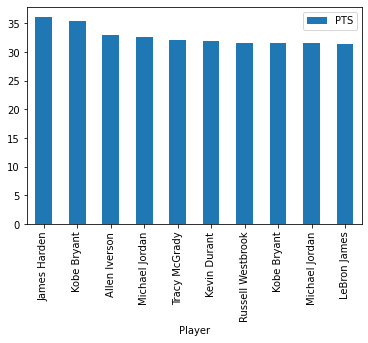

In [224]:
hs.plot.bar("Player", "PTS")

In [225]:
highest_scoring_by_year = train.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
hgs = highest_scoring_by_year
hgs

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,9994,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,0.4,1.1,0.312,11.7,21.3,0.551,0.547,7.0,8.2,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,1991,891.0,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
1992,10007,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,0.3,1.3,0.270,11.5,21.5,0.533,0.526,6.1,7.4,0.832,1.1,5.3,6.4,6.1,2.3,0.9,2.5,2.5,30.1,1992,900.0,960.0,0.938,Chicago Bulls,67,15,0.817,0.0,109.9,99.5,10.07
1993,10020,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,1.0,2.9,0.352,11.7,22.7,0.514,0.515,6.1,7.3,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6,1993,565.0,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,8751,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,0.1,0.4,0.345,10.4,20.4,0.510,0.510,8.7,11.6,0.749,3.0,7.7,10.7,4.8,1.7,3.3,3.2,2.9,29.8,1994,730.0,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,7431,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,0.0,0.1,0.000,11.8,20.1,0.585,0.583,5.8,10.8,0.533,4.2,7.3,11.4,2.7,0.9,2.4,2.6,3.3,29.3,1995,605.0,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,10527,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,1.4,3.2,0.427,9.8,19.4,0.506,0.525,6.7,8.0,0.834,1.8,4.8,6.6,4.3,2.2,0.5,2.4,2.4,30.4,1996,1114.0,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,10541,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,1.4,3.6,0.374,9.9,19.5,0.507,0.516,5.9,7.0,0.833,1.4,4.5,5.9,4.3,1.7,0.5,2.0,1.9,29.6,1997,957.0,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,10555,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,0.4,1.5,0.238,10.4,21.5,0.482,0.473,6.9,8.8,0.784,1.6,4.2,5.8,3.5,1.7,0.5,2.3,1.8,28.7,1998,1084.0,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,1148,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,1.2,4.1,0.291,7.9,17.9,0.440,0.439,7.4,9.9,0.751,1.4,3.5,4.9,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56


Boxplot graph.

<AxesSubplot:xlabel='PTS', ylabel='Player'>

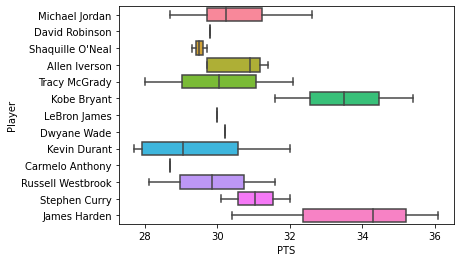

In [226]:
sns.boxplot(x=hgs.iloc[:,28], y=hgs.iloc[:,0], showfliers=False, saturation=1)

In [227]:
hgs.reset_index(drop=True, inplace=True) 

Score graph by years

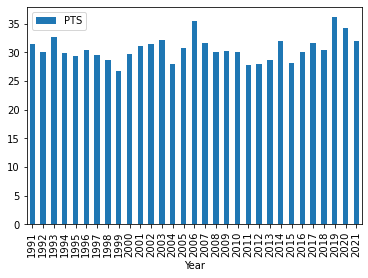

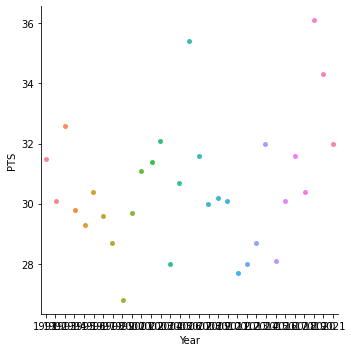

In [228]:
hgs.plot.bar("Year", "PTS")
sns.catplot(x = "Year", y = "PTS", data = hgs)

lebron james in hgs (highest_scoring_by_year)

In [229]:
hgs[hgs["Player"] == "LeBron James"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
17,LeBron James,SF,23,CLE,75,74,40.4,10.6,21.9,0.484,1.5,4.8,0.315,9.1,17.1,0.531,0.518,7.3,10.3,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,2008,438.0,1260.0,0.348,Cleveland Cavaliers,45,37,0.549,14.0,96.4,96.7,-0.53


Sum of row values by years

In [230]:
train.groupby("Year").apply(lambda x: x.shape[0])

Year
1991    385
1992    386
1993    390
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
dtype: int64

So, which statistics are more related to MVP votes, let's look at it.

In [231]:
train.corr()["Share"]

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.064901
3P         0.096225
3PA        0.096460
3P%        0.030621
2P         0.275976
2PA        0.251885
2P%        0.061986
eFG%       0.058549
FT         0.316392
FTA        0.321457
FT%        0.040052
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071046
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

We understand that points on the field are strongly correlated with point average and MVP votes.

<AxesSubplot:>

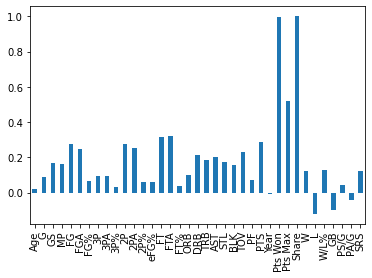

In [232]:
train.corr()["Share"].plot.bar()

In [233]:
combined.info()
cmb = combined
cmb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  object 
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  object 
 5   GS       14092 non-null  object 
 6   MP       14092 non-null  object 
 7   FG       14092 non-null  object 
 8   FGA      14092 non-null  object 
 9   FG%      14092 non-null  object 
 10  3P       14092 non-null  object 
 11  3PA      14092 non-null  object 
 12  3P%      14092 non-null  object 
 13  2P       14092 non-null  object 
 14  2PA      14092 non-null  object 
 15  2P%      14092 non-null  object 
 16  eFG%     14092 non-null  object 
 17  FT       14092 non-null  object 
 18  FTA      14092 non-null  object 
 19  FT%      14092 non-null  object 
 20  ORB      14092 non-null  object 
 21  DRB      140

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,0,0,0,3.4,6.2,0.545,0.543,1,1.7,0.561,1.7,3,4.8,0.9,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0,Toronto Raptors
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,0,0,0,2.5,5.5,0.451,0.451,1.5,2.2,0.69,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0,Toronto Raptors
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,0,0,0,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0,Boston Celtics
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,0,0,0,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0,Indiana Pacers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,0,0,0,2.1,4,0.532,0.532,1.6,2.6,0.619,2.1,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,2014,0.0,0.0,0.0,Houston Rockets
14088,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,0,0,0,2.8,5.4,0.517,0.517,1.7,3,0.582,3.2,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,2015,0.0,0.0,0.0,New Orleans Pelicans
14089,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,0,0,0,1.5,2.9,0.533,0.533,0.9,1.6,0.545,1.8,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4,2016,0.0,0.0,0.0,New Orleans Pelicans
14090,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,0,0,0,1,2.1,0.477,0.477,0.7,1.3,0.59,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,2017,0.0,0.0,0.0,New Orleans Pelicans


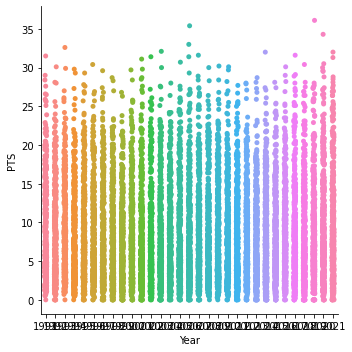

In [234]:
sns.catplot(x = "Year", y = "PTS", data = train)

New edited file has been saved

In [235]:
nba = pd.read_csv("C:/Users//NORA JDK/player_mvp_stats.csv")
nba

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0.0,0.0,0.000,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1.0,2.0,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
1,1,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,0.250,0.0,0.0,0.000,0.1,0.6,0.250,0.250,0.4,0.9,0.500,0.1,1.3,1.4,0.0,0.1,0.0,0.1,0.9,0.7,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
2,2,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,0.523,0.0,0.0,0.000,2.8,5.3,0.526,0.523,1.2,1.9,0.624,1.6,3.0,4.6,0.7,0.7,0.6,1.2,2.2,6.8,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
3,3,Charles Jones,PF,37,HOU,3,0,12.0,0.3,1.0,0.333,0.0,0.0,0.000,0.3,1.0,0.333,0.333,0.3,0.7,0.500,0.7,1.7,2.3,0.0,0.0,0.3,0.0,2.7,1.0,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
4,4,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,0.603,0.0,0.1,0.333,2.5,4.2,0.608,0.606,0.9,1.5,0.613,1.6,3.0,4.6,0.7,0.3,0.3,0.7,2.6,6.1,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15.0,103.5,101.4,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2.0,3.6,0.556,0.529,0.8,1.0,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,0.000,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [236]:
nba.describe().T # eksik gözlemleri göz ardı eder ayrıca kategorik ve sayısal olmayan değişkenleri görmezden gelir

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14092.0,7045.500000,4068.154332,0.000,3522.750,7045.500,10568.2500,14091.00
Age,14092.0,26.750568,4.242542,18.000,23.000,26.000,30.0000,44.00
G,14092.0,52.595586,25.101975,1.000,33.000,59.000,75.0000,85.00
GS,14092.0,25.625816,29.069866,0.000,1.000,11.000,51.0000,83.00
MP,14092.0,20.379783,10.115839,0.000,12.000,19.800,28.8000,43.70
FG,14092.0,3.097005,2.204090,0.000,1.400,2.600,4.4000,12.70
FGA,14092.0,6.885531,4.638717,0.000,3.200,5.800,9.7000,27.80
FG%,14092.0,0.436985,0.096085,0.000,0.400,0.440,0.4820,1.00
3P,14092.0,0.539015,0.674970,0.000,0.000,0.300,0.9000,5.30
3PA,14092.0,1.546225,1.777399,0.000,0.100,0.900,2.6000,13.20


- **count:** number of entries
- **mean :** average of entries
- **std :** standard deviation
- **min :** minimum data value
- **25% :** the median of values that are less than the median of the first quarter (lower median)**
- **50% :** median
- **75% :** the median of values greater than the median of the third quarter (upper median)**
- **max :** maximum data value

In [237]:
nbaBasic = nba[nba["Year"] > 2018].sort_values("PTS", ascending=False).head(250)
#ranked the players who scored the most points after 2018.
# limited the list to 250, it was very big data.
nbaBasic

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9701,9701,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,776.0,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
9718,9718,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,2020,367.0,1010.0,0.363,Houston Rockets,44,28,0.611,0.0,117.8,114.8,3.13
3760,3760,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,5.3,12.7,0.421,5.1,9.0,0.569,0.605,5.7,6.3,0.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,2021,453.0,1010.0,0.449,Golden State Warriors,39,33,0.542,12.0,113.7,112.7,1.10
3972,3972,Bradley Beal,SG,27,WAS,60,60,35.8,11.2,23.0,0.485,2.2,6.2,0.349,9.0,16.8,0.535,0.532,6.8,7.7,0.889,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,2021,0.0,0.0,0.000,Washington Wizards,34,38,0.472,7.0,116.6,118.5,-1.85
1924,1924,Bradley Beal,SG,26,WAS,57,57,36.0,10.4,22.9,0.455,3.0,8.4,0.353,7.4,14.4,0.515,0.520,6.8,8.0,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,2020,0.0,0.0,0.000,Washington Wizards,25,47,0.347,18.5,114.4,119.1,-5.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,6178,Kendrick Nunn,PG,24,MIA,67,67,29.3,6.0,13.6,0.439,2.0,5.8,0.350,3.9,7.8,0.505,0.514,1.3,1.5,0.850,0.3,2.4,2.7,3.3,0.8,0.2,1.7,2.3,15.3,2020,0.0,0.0,0.000,Miami Heat,44,29,0.603,0.0,112.0,109.1,2.59
11449,11449,Nikola Miroti?,PF,27,MIL,46,25,27.1,5.2,11.8,0.439,2.5,6.9,0.365,2.7,4.9,0.545,0.546,2.3,2.7,0.847,1.3,6.1,7.4,1.2,0.7,0.7,1.0,2.3,15.2,2019,0.0,0.0,0.000,Milwaukee Bucks,60,22,0.732,0.0,118.1,109.3,8.04
11296,11296,Clint Capela,C,26,ATL,63,63,30.1,6.6,11.0,0.594,0.0,0.0,0.000,6.6,11.0,0.594,0.594,2.1,3.6,0.573,4.7,9.6,14.3,0.8,0.7,2.0,1.2,2.3,15.2,2021,0.0,0.0,0.000,Atlanta Hawks,41,31,0.569,0.0,113.7,111.4,2.14
11333,11333,Jordan Clarkson,SG,27,UTA,71,2,24.0,5.5,12.2,0.454,2.1,5.8,0.368,3.4,6.4,0.533,0.542,1.9,2.3,0.836,0.7,1.9,2.6,1.9,0.6,0.2,1.4,1.5,15.2,2020,0.0,0.0,0.000,Utah Jazz,44,28,0.611,1.5,111.3,108.8,2.52


THE NAMES OF THE PLAYERS HAVE BEEN PRINTED

In [238]:
print(nbaBasic.Player.unique()) 

['James Harden' 'Stephen Curry' 'Bradley Beal' 'Damian Lillard'
 'Trae Young' 'Giannis Antetokounmpo' 'Luka Don?i?' 'Joel Embiid'
 'Paul George' 'Zach LaVine' 'LeBron James' 'Kyrie Irving'
 'Russell Westbrook' 'Kawhi Leonard' 'Zion Williamson' 'Kevin Durant'
 'Devin Booker' 'Karl-Anthony Towns' 'Jayson Tatum' 'Donovan Mitchell'
 'Nikola Joki?' 'Anthony Davis' 'Kemba Walker' "De'Aaron Fox"
 'Jaylen Brown' 'Blake Griffin' 'Collin Sexton' 'Julius Randle'
 'Brandon Ingram' 'Shai Gilgeous-Alexander' 'Nikola Vu?evi?'
 "D'Angelo Russell" 'CJ McCollum' 'Pascal Siakam' 'Jerami Grant'
 'DeMar DeRozan' 'Andrew Wiggins' 'John Collins' 'Klay Thompson'
 'Jimmy Butler' 'LaMarcus Aldridge' 'Malcolm Brogdon' 'Jrue Holiday'
 'Jamal Murray' 'Mike Conley' 'Christian Wood' 'Khris Middleton'
 'Buddy Hield' 'John Wall' 'Spencer Dinwiddie' 'Kristaps Porzi??is'
 'Terry Rozier' 'Domantas Sabonis' 'Bojan Bogdanovi?' 'Caris LeVert'
 'Lou Williams' 'JaKarr Sampson' 'Tobias Harris' 'T.J. Warren'
 'Danilo Gallinari'

In [239]:
nbaBasic["Player"].value_counts().count() # how many people have ?

122

In [240]:
nbaBasic["Player"].value_counts() #how many times have their names been mentioned in the top 250?

James Harden        3
Jrue Holiday        3
Brandon Ingram      3
Chris Paul          3
Nikola Vu?evi?      3
                   ..
Marcus Morris       1
Josh Richardson     1
Kevin Porter Jr.    1
Khyri Thomas        1
Nikola Miroti?      1
Name: Player, Length: 122, dtype: int64

In [241]:
nbaBasic["Tm"].value_counts() #The teams in the top 250.

TOR    12
MIL    11
BOS    11
HOU    11
POR    11
PHI    10
LAC    10
GSW     9
MIN     9
IND     9
UTA     9
NOP     9
PHO     9
CLE     8
SAC     8
ATL     8
MIA     8
BRK     8
LAL     8
MEM     8
OKC     8
DAL     8
DEN     7
CHO     7
DET     7
SAS     7
WAS     6
CHI     6
ORL     5
NYK     3
Name: Tm, dtype: int64

In [242]:
nb = nbaBasic.copy()
nb.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9701,9701,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,776.0,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
9718,9718,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,2020,367.0,1010.0,0.363,Houston Rockets,44,28,0.611,0.0,117.8,114.8,3.13
3760,3760,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,5.3,12.7,0.421,5.1,9.0,0.569,0.605,5.7,6.3,0.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,2021,453.0,1010.0,0.449,Golden State Warriors,39,33,0.542,12.0,113.7,112.7,1.10
3972,3972,Bradley Beal,SG,27,WAS,60,60,35.8,11.2,23.0,0.485,2.2,6.2,0.349,9.0,16.8,0.535,0.532,6.8,7.7,0.889,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,2021,0.0,0.0,0.000,Washington Wizards,34,38,0.472,7.0,116.6,118.5,-1.85
1924,1924,Bradley Beal,SG,26,WAS,57,57,36.0,10.4,22.9,0.455,3.0,8.4,0.353,7.4,14.4,0.515,0.520,6.8,8.0,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,2020,0.0,0.0,0.000,Washington Wizards,25,47,0.347,18.5,114.4,119.1,-5.24


<AxesSubplot:title={'center':'PTS'}, xlabel='Tm'>

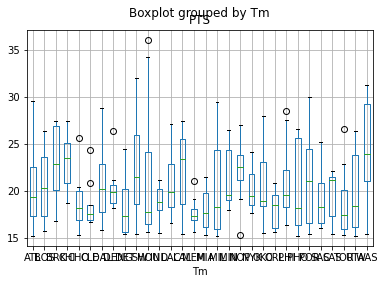

In [243]:
nb.boxplot(column = "PTS", by = "Tm")

Text(0.5, 1.0, 'Distribution of the Tool Variable')

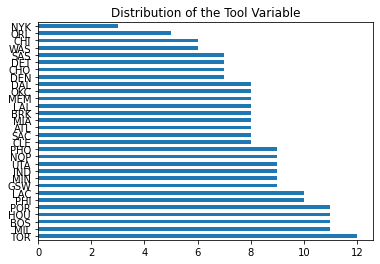

In [244]:
nb["Tm"].value_counts().plot.barh().set_title("Distribution of the Tool Variable")

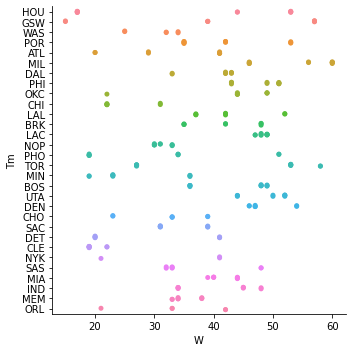

In [245]:
sns.catplot(x = "W", y = "Tm", data = nb)

Conclusion: By looking at the graph above, we can see that after 2018, the players on the Toronto and Portland team individually scored few points and won a lot of matches compared to the others. We see that the players in Orlando, on the other hand, score a lot individually and get few wins.

<AxesSubplot:xlabel='Year', ylabel='W'>

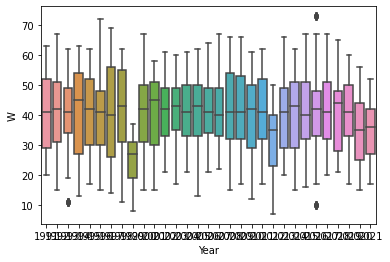

In [246]:
sns.boxplot(x = "Year", y = "W", data = nba)

#### HEAT MAP
Heatmaps are used to cross-examine multivariate data by placing variables in rows and columns and coloring the cells in the table. Heat maps show the variance between multiple variables to uncover any design to show whether any variable are similar to each other, and can be used for to determine whether there is any correlation between them.

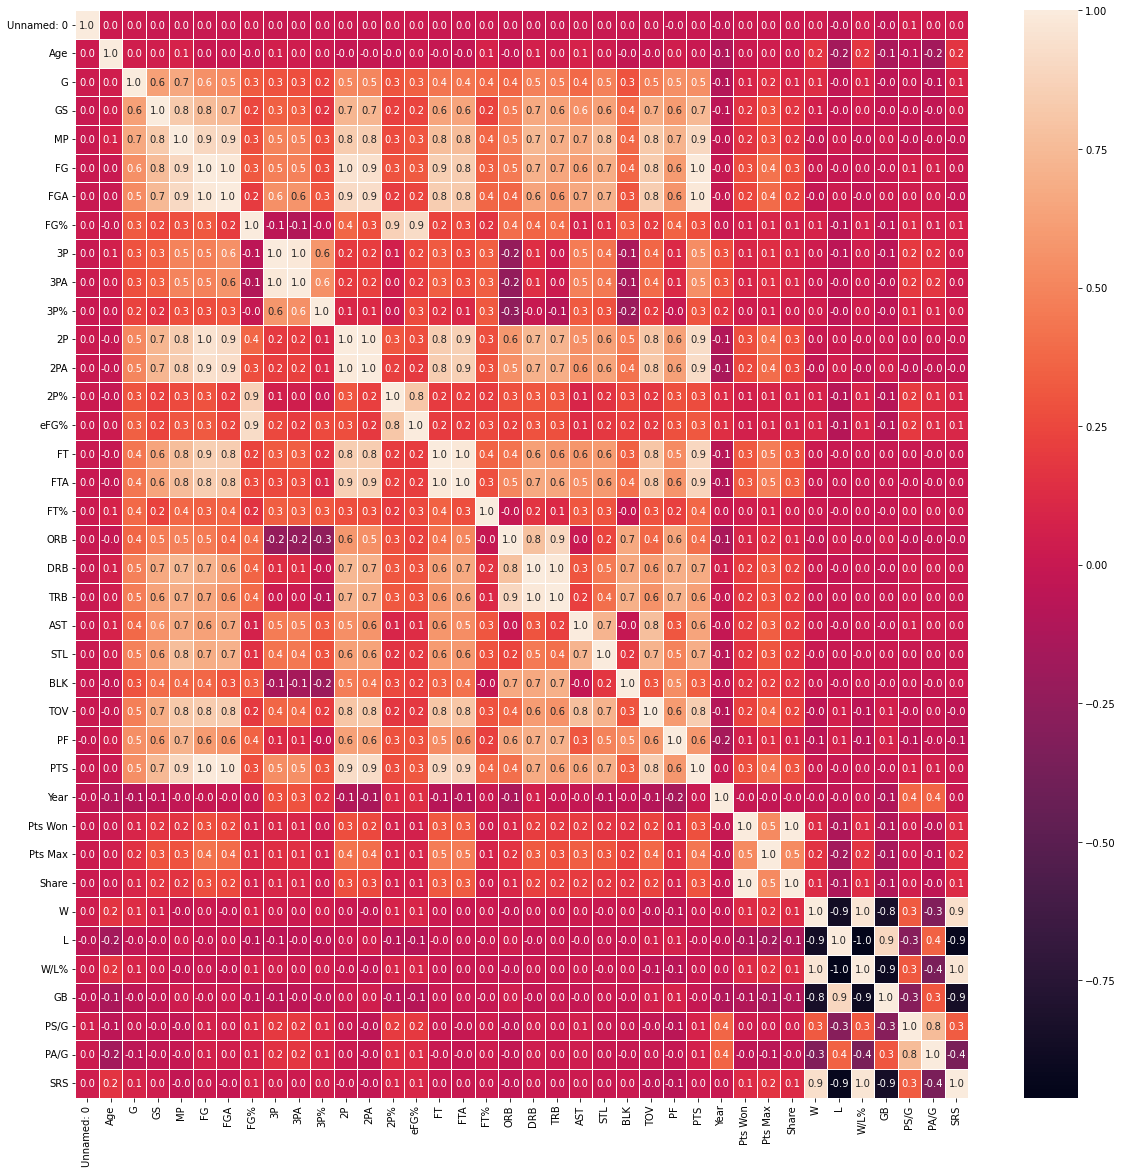

In [247]:
(f, ax) = plt.subplots(figsize=(20, 20))
sns.heatmap(nba.corr(), annot = True, linewidths = 1, fmt = '.1f', ax = ax)
plt.show()

The percentages of shots for the heatmap appear to be very good playing with the block.